# Importing the necessary Libraries and Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the Dataset:

In [2]:
train=pd.read_csv(r'C:\Users\$ubhajit\Downloads/SUBHAJIT MONDAL - train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Dataset Size:

In [5]:
train.shape

(891, 12)

In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Total observations: 891 (Each observation is the data about a block group)
- Total columns (features): 11
- Data type of each feature: 5 numerical(integer),2 numerical(float) and 5 object
- Features with null values : 3, Cabin,Embarked,Age

# Univariate EDA:

## What is the Count of Survived vs Not Survived?

In [8]:
train_df_survived=len(train[train['Survived'] == 1])
print("No. of Survived passengers = ", train_df_survived)

No. of Survived passengers =  342


In [9]:
train_df_not_survived=len(train[train['Survived'] == 0])
print("No. of passengers not survived = ", train_df_not_survived)

No. of passengers not survived =  549


## Find out the Numerical Columns Basic Statistics:

In [10]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"McNamee, Mr. Neal",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,CA. 2343,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


1. 891 passengers details are there in the dataset.
2. 3 passenger class are there in the dataset.
3. 204 cabins are distributed among 891 passengers. G6 cabin have *maximum* number of passengers.
4. Passengers were embarked from 3 ports.
5. There are more male passengers than female.
6. Minimum fare was 32.2042 and maximum fare was 512.329.
7. In Survived column,0- passenger not survived, 1- passenger survived.

## Visualization of Survived vs Not Survived:

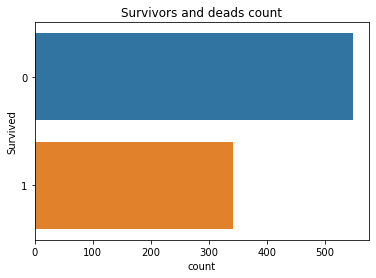

In [11]:
g = sns.countplot(y=train['Survived']).set_title('Survivors and deads count')

## Visual EDA for single Categorical Column: "Embarked"

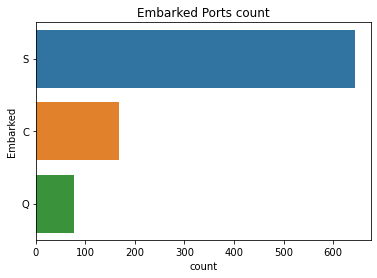

In [12]:
f = sns.countplot(y=train['Embarked']).set_title('Embarked Ports count')

Number of passengers embarked from port S was maximum.

## Visual EDA for single Continuous Column: "Fare" using Distribution Plot

Text(0, 0.5, 'N0. of passengers')

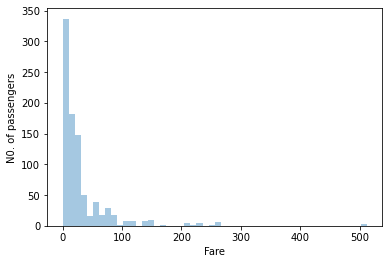

In [13]:
e=train['Fare']
sns.distplot(e, kde=False)
plt.ylabel('N0. of passengers', fontsize = 10)

No. of passengers who paid minimum fare was maximum.

## Visual EDA for single Continuous Column: "Fare" using KDE(Kernel Density Estimation) Plot

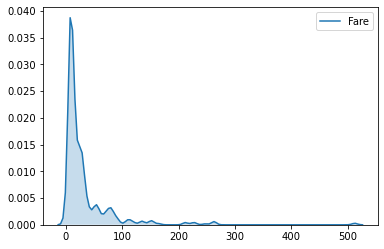

In [14]:
sns.kdeplot(e, shade=True);

# Bivariate EDA:

##  What is the count of Males and Females Survived and Not Survived in each Class?

In [15]:
male_vs_female=['PassengerId','Survived','Pclass','Sex']
train[male_vs_female].head()

,PassengerId,Survived,Pclass,Sex
0,1,0,3,male
1,2,1,1,female
2,3,1,3,female
3,4,1,1,female
4,5,0,3,male


In [16]:
male_vs_female_survived=train[male_vs_female].query('Survived>0')
male_vs_female_survived.head()

,PassengerId,Survived,Pclass,Sex
1,2,1,1,female
2,3,1,3,female
3,4,1,1,female
8,9,1,3,female
9,10,1,2,female


In [17]:
pd.crosstab(male_vs_female_survived.Pclass,male_vs_female_survived.Sex, margins=True, margins_name="Total")

Sex,female,male,Total
Pclass,,,
1,91,45,136
2,70,17,87
3,72,47,119
Total,233,109,342


1. Class 1- 91 female passengers, 45 male passengers.
2. Class 2- 70 female passengers, 17 male passengers.
3. Class 3- 72 female passengers, 47 male passengers.

Class 1 have maximum number of passengers.

## Visualize Survived and Not Survived with respect to the 'Embarked' Column:

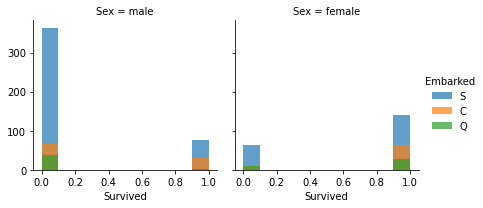

In [18]:
g = sns.FacetGrid(train, col="Sex", hue="Embarked")
g.map(plt.hist, "Survived",alpha=.7)
g.add_legend();

No. of passengers embarked from port S was maximum. So, Survived male and female passengers were maximum who embarked from port S.

## Plot a Desnity Graph based on Fare and Survival Rate:

In [19]:
Survival=pd.crosstab(train.Fare, train.Survived).reset_index()

Survival['Survival_rate']=(Survival[1]/(Survival[0]+Survival[1]))*100

Survival

Survived,Fare,0,1,Survival_rate
0,0.0000,14,1,6.666667
1,4.0125,1,0,0.000000
2,5.0000,1,0,0.000000
3,6.2375,1,0,0.000000
4,6.4375,1,0,0.000000
...,...,...,...,...
243,227.5250,1,3,75.000000
244,247.5208,1,1,50.000000
245,262.3750,0,2,100.000000
246,263.0000,2,2,50.000000


Text(0, 0.5, 'Survival Rate')

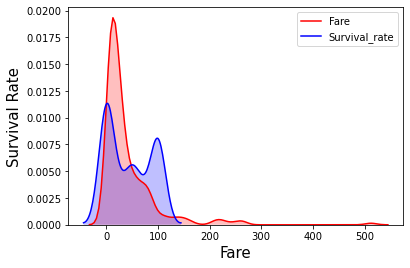

In [20]:
p1=sns.kdeplot(Survival['Fare'],shade=True, color="r")
p1=sns.kdeplot(Survival['Survival_rate'], shade=True, color="b")
plt.xlabel('Fare', fontsize = 15) 
plt.ylabel('Survival Rate', fontsize = 15)

## Plot a Distplot based on Fare and Survival Rate:

Text(0, 0.5, 'Survival Rate')

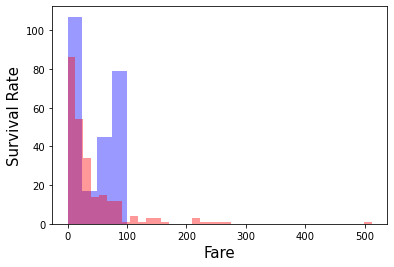

In [21]:
p2=sns.distplot(Survival['Survival_rate'],kde=False, color="b")
p2=sns.distplot(Survival['Fare'],kde=False, color="r")
plt.xlabel('Fare', fontsize = 15) 
plt.ylabel('Survival Rate', fontsize = 15)

## How are "Age" and "Fare" Columns related? Plot a Graph for the same:

In [22]:
df1=pd.crosstab(train.Fare, train.Age,margins=True,margins_name="Total" ).reset_index()
df1

Age,Fare,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,...,63.0,64.0,65.0,66.0,70.0,70.5,71.0,74.0,80.0,Total
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,4.0125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,6.2375,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6.4375,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,247.521,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
217,262.375,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
218,263,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4
219,512.329,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


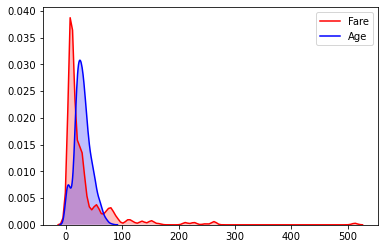

In [23]:
p3=sns.kdeplot(train['Fare'],shade=True, color="r")
p3=sns.kdeplot(train['Age'], shade=True, color="b")


# Multivariate EDA:

## Does Age have an impact on Survival Rate for each Sex and Class group?

In [24]:
df2=pd.crosstab(train.Age, train.Sex,margins=True,margins_name="Total" ).reset_index()
df2

Sex,Age,female,male,Total
0,0.42,0,1,1
1,0.67,0,1,1
2,0.75,2,0,2
3,0.83,0,2,2
4,0.92,0,1,1
...,...,...,...,...
84,70.5,0,1,1
85,71,0,2,2
86,74,0,1,1
87,80,0,1,1


In [25]:
df3=pd.crosstab(train.Age, train.Pclass,margins=True,margins_name="Total" ).reset_index()
df3

Pclass,Age,1,2,3,Total
0,0.42,0,0,1,1
1,0.67,0,1,0,1
2,0.75,0,0,2,2
3,0.83,0,2,0,2
4,0.92,1,0,0,1
...,...,...,...,...,...
84,70.5,0,0,1,1
85,71,2,0,0,2
86,74,0,0,1,1
87,80,1,0,0,1


In [26]:
df4=pd.crosstab(train.Age, train.Survived,margins=False,margins_name="Total" ).reset_index()
df4['Survival_rate']=(Survival[1]/(Survival[0]+Survival[1]))*100

df4

Survived,Age,0,1,Survival_rate
0,0.42,0,1,6.666667
1,0.67,0,1,0.000000
2,0.75,0,2,0.000000
3,0.83,0,2,0.000000
4,0.92,0,1,0.000000
...,...,...,...,...
83,70.00,2,0,100.000000
84,70.50,1,0,0.000000
85,71.00,2,0,38.095238
86,74.00,1,0,100.000000


In [27]:
male_vs_female_1=['Survived','Pclass','Sex','Age']
train[male_vs_female_1].head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [28]:
train[male_vs_female_1].corr(method='pearson')

,Survived,Pclass,Age
Survived,1.000000,-0.338481,-0.077221
Pclass,-0.338481,1.000000,-0.369226
Age,-0.077221,-0.369226,1.000000


In [29]:
df6=(train.groupby(['Pclass'])['Survived'].sum()/train.groupby(['Pclass'])['Survived'].count()*100).reset_index()
df6

,Pclass,Survived
0,1,62.962963
1,2,47.282609
2,3,24.236253


Text(0.5, 0.98, 'Class and gender wise Survival rate segregation of passengers')

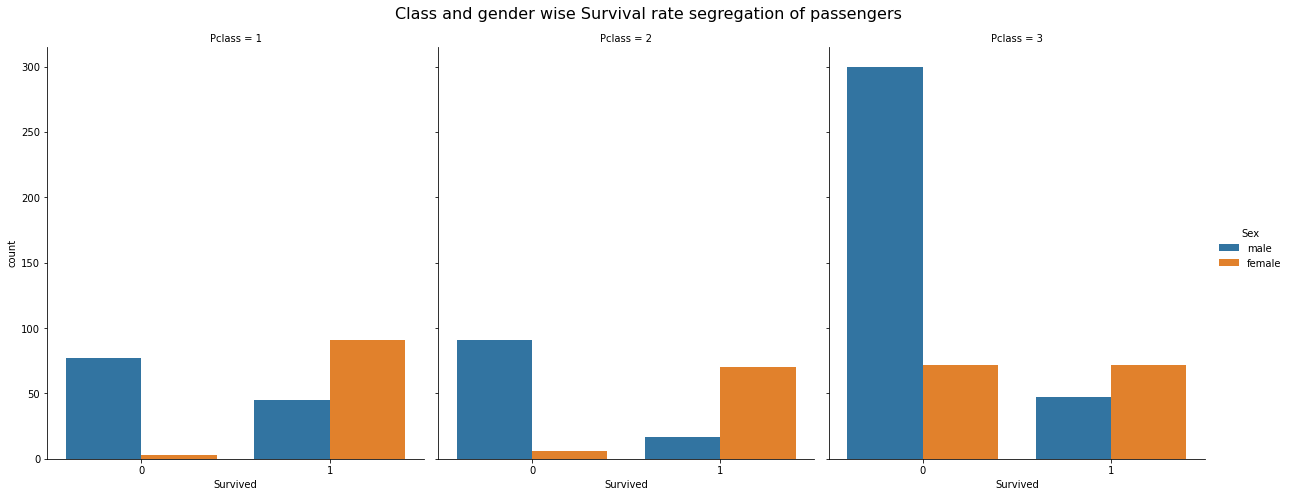

In [30]:
sns.factorplot('Survived', col='Pclass', hue='Sex', data=train, kind='count', size=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class and gender wise Survival rate segregation of passengers', fontsize=16)

Age not have much impact on survival rate, rather class 1 passengers have greater survival rate. But there are more female survived than male in class 1.

## Plot a HEATMAP showing the correlations between different features:

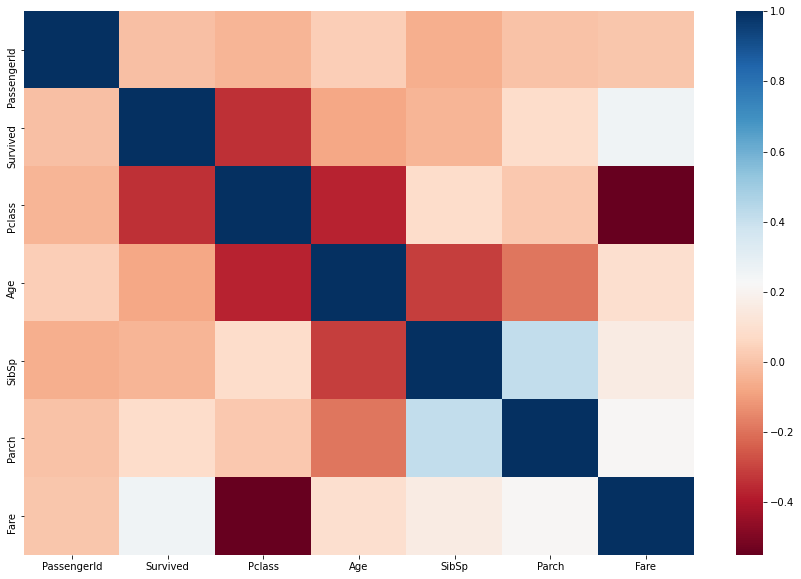

In [31]:
fig = plt.figure(figsize = (15,10))
sns.heatmap(train.corr(),cmap='RdBu')

# Conclusion

There were 891 passengers details in the dataset.As per EDA more male passengers were survived than female.Passengers who paid more fare securing class 1(Socio-Economic status) have more survival rate. Age have some descrete impact on survival rate.

There were some limitation for this dataset such as missing values for some attributes of passesngers. 